In [5]:
import numpy as np
# import tensorflow as tf
# import pandas as pd

import matplotlib.pyplot as plt

# from collections import namedtuple
# import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import data_processing as dp
import rnn_classifier as rc
import model_utilities as mu 
import evaluation as ev

In [7]:
vocab, all_labels, sents, labels = dp.load_problem(lang='ma')

In [8]:
cls = rc.RnnClassifier(vocab, n_topics=len(all_labels))

Tensor("input/embedding_lookup:0", shape=(?, ?, 100), dtype=float64)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 128) dtype=float64>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 128) dtype=float64>)


In [9]:
batch_sampler = mu.BatchSampler(sents=sents, labels=labels, vocab=vocab, all_labels=all_labels, batch_size=64)

In [10]:
trainer = mu.Trainer(cls)

In [13]:
# trainer.restore("./checkpoints/checkpoint.ckpt-2")

In [12]:
trainer.train(batch_sampler=batch_sampler, n_epochs=3, max_iterations=10**5, save_path="./checkpoints/checkpoint.ckpt", save_every=1)

0it [00:00, ?it/s]

Starting epoch  0


140it [00:53,  2.61it/s]
0it [00:00, ?it/s]

After epoch 0 validation_loss = 1.2259316735930996, train_loss = 1.2740957623652918
Starting epoch  1


140it [00:49,  2.81it/s]


After epoch 1 validation_loss = 1.1550206042789906, train_loss = 1.109099845492381


0it [00:00, ?it/s]

Starting epoch  2


140it [00:50,  2.75it/s]


After epoch 2 validation_loss = 1.1525336269288802, train_loss = 1.06083367432101


In [51]:
x, mask, y = batch_sampler.get_test()

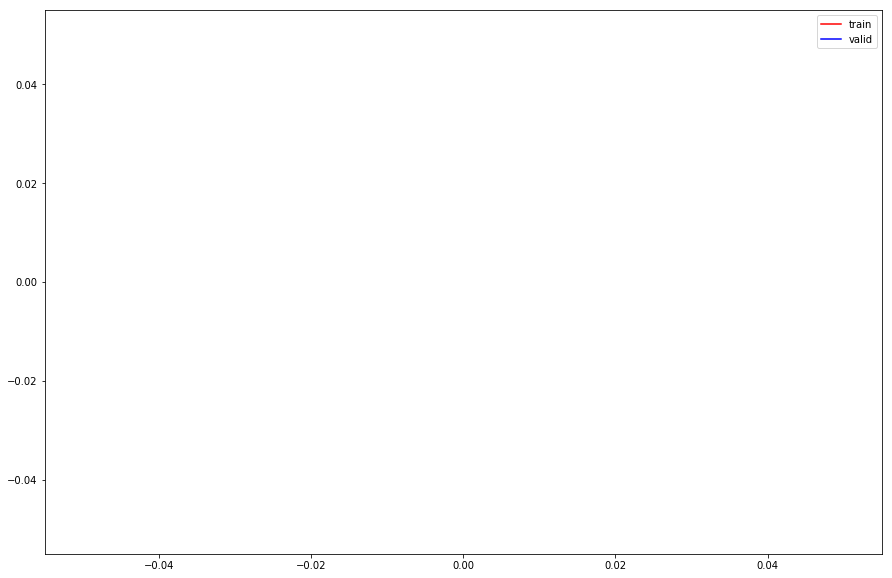

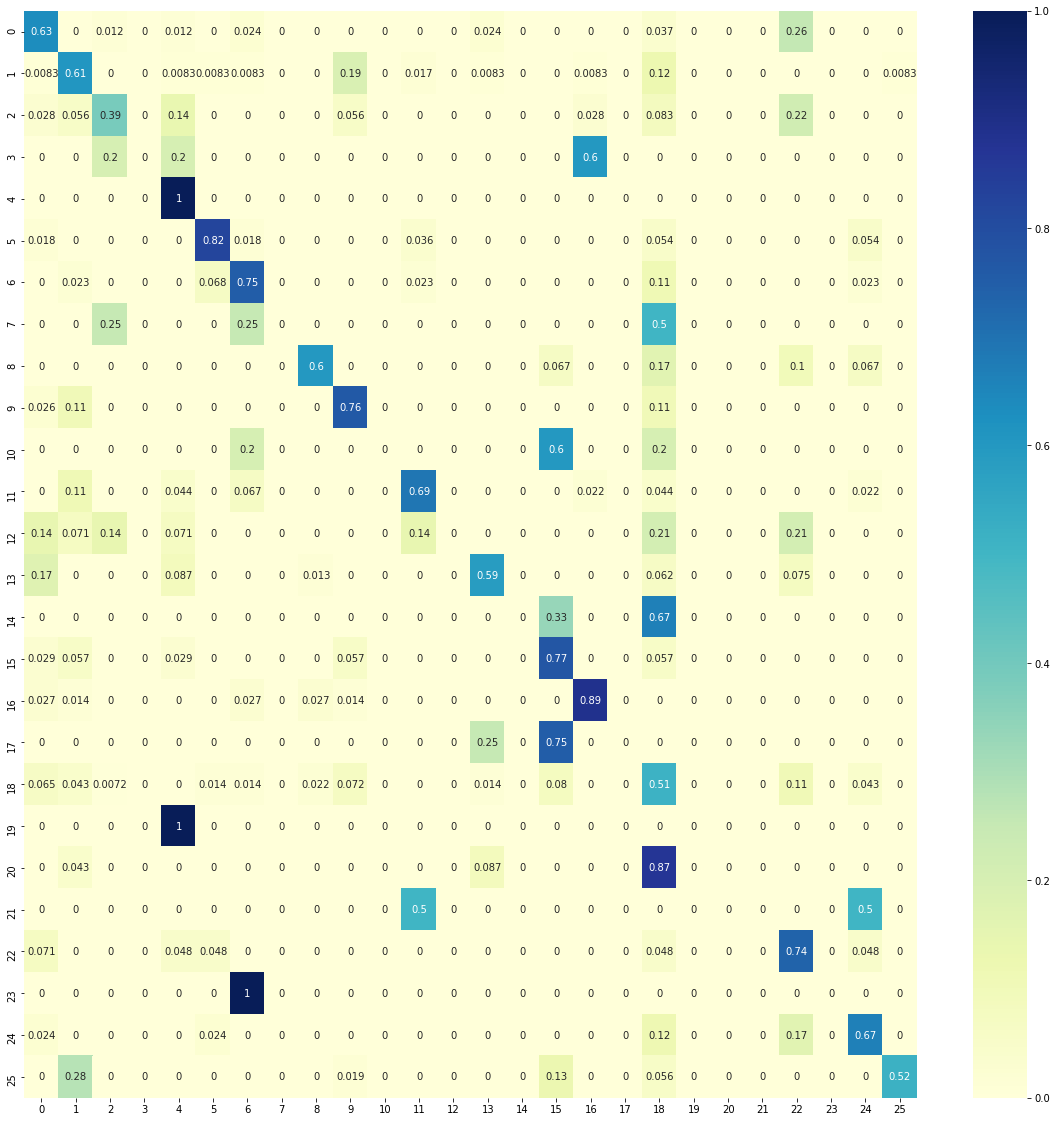

In [52]:
res = ev.describe(trainer, x, mask, y)

In [41]:
res

((89, 1024, 0.0869140625),
 {0: (6, 96, 0.0625),
  1: (31, 180, 0.17222222222222222),
  2: (0, 0, 0.0),
  3: (0, 4, 0.0),
  4: (0, 7, 0.0),
  5: (0, 3, 0.0),
  6: (1, 10, 0.1),
  7: (0, 2, 0.0),
  8: (0, 32, 0.0),
  9: (0, 1, 0.0),
  10: (0, 18, 0.0),
  11: (0, 5, 0.0),
  12: (0, 9, 0.0),
  13: (26, 236, 0.11016949152542373),
  14: (0, 2, 0.0),
  15: (1, 54, 0.018518518518518517),
  16: (0, 0, 0.0),
  17: (0, 3, 0.0),
  18: (22, 146, 0.1506849315068493),
  19: (0, 0, 0.0),
  20: (0, 2, 0.0),
  21: (0, 37, 0.0),
  22: (1, 27, 0.037037037037037035),
  23: (0, 41, 0.0),
  24: (0, 0, 0.0),
  25: (1, 109, 0.009174311926605505)},
 {0: (6, 82, 0.07317073170731707),
  1: (31, 120, 0.25833333333333336),
  2: (0, 36, 0.0),
  3: (0, 5, 0.0),
  4: (0, 43, 0.0),
  5: (0, 56, 0.0),
  6: (1, 44, 0.022727272727272728),
  7: (0, 4, 0.0),
  8: (0, 30, 0.0),
  9: (0, 38, 0.0),
  10: (0, 5, 0.0),
  11: (0, 45, 0.0),
  12: (0, 14, 0.0),
  13: (26, 80, 0.325),
  14: (0, 6, 0.0),
  15: (1, 35, 0.028571428571

In [280]:
# batch_sampler.sents[0]